In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.pyplot import imread
from imageio import imwrite

Shape of original image: (1080, 1920, 3)
Size of original image: 101.98 KB


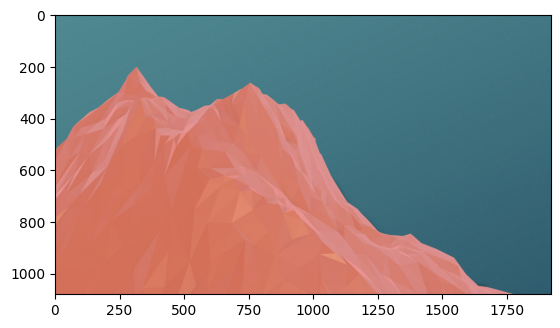

In [2]:
img = imread("Mountain.jpg")
plt.imshow(img)
print("Shape of original image:", img.shape)

# Get the size of the original image in bytes
file_size_bytes = os.path.getsize("Mountain.jpg")
file_size_kb = file_size_bytes / 1024

print(f"Size of original image: {file_size_kb:.2f} KB")

Shape of grayscale image: (1080, 1920, 3)
Size of grayscale image: 76.26 KB


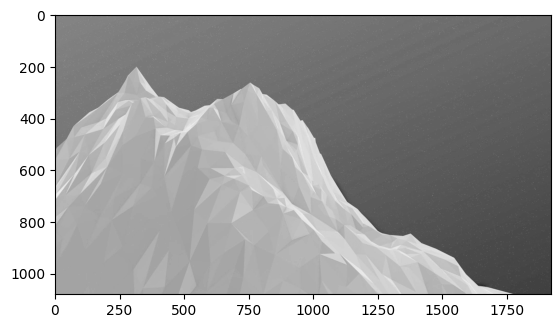

In [8]:
# Convert image to grayscale
grayscale_img = img.mean(axis=2)

# Save the grayscale image to disk
grayscale_image_path = "grayscale_image.jpg"
imwrite(grayscale_image_path, grayscale_img.astype(np.uint8))

# Get size of the grayscale image in bytes
file_size_bytes = os.path.getsize(grayscale_image_path)
file_size_kb = file_size_bytes / 1024

plt.imshow(grayscale_img, cmap="gray")
print("Shape of grayscale image:", img.shape)
print(f"Size of grayscale image: {file_size_kb:.2f} KB")

In [13]:
def pca_numpy(img, percentage):
    
    # Flatten the 2D image into a 1D array (only for grayscale)
    original_shape = grayscale_img.shape
    img_flat = grayscale_img.reshape(-1, original_shape[1])
    
    # Standardize the data (center the data)
    img_mean = np.mean(img_flat, axis=0)
    img_centered = img_flat - img_mean

    # Compute the covariance matrix
    covariance_matrix = np.cov(img_centered, rowvar=False)

    # Perform eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Define number of pricipal components to be selected
    num_components = 100

    # Select the top 'num_components' eigenvectors
    principal_components = eigenvectors[:, :num_components]

    # Project the data onto the principal components
    transformed = np.dot(img_centered, principal_components)

    # Reconstruct the image from the transformed data
    projected = np.dot(transformed, principal_components.T) + img_mean
    projected_img = projected.reshape(original_shape)

    return projected_img

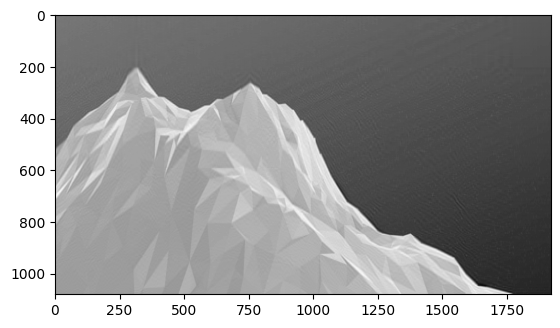

Shape of compressed image (1080, 1920)
Size of compressed image: 57.98 KB


In [14]:
# Compress the image using the pca_numpy function
compressed_img = pca_numpy(grayscale_img, 90)

# Display the compressed image
plt.imshow(compressed_img, cmap="gray")
plt.show()

# Save the compressed image to disk
compressed_image_path = "compressed_image.jpg"
imwrite(compressed_image_path, compressed_img.astype(np.uint8))

# Get the size of the compressed image file in bytes
file_size_bytes = os.path.getsize(compressed_image_path)
file_size_kb = file_size_bytes / 1024

print("Shape of compressed image", compressed_img.shape)
print(f"Size of compressed image: {file_size_kb:.2f} KB")